<a href="https://colab.research.google.com/github/SirigineediDivya/FMML_LABS_PROJECTS_26/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Random Forest & Ensemble Learning:**

**1. What is Random Forest?**
Random Forest is an ensemble learning method that constructs multiple decision trees and merges their results to improve accuracy and reduce overfitting.

It is a supervised learning algorithm used for both classification and regression tasks.
It combines the output of multiple decision trees to provide a final result.


**Real-Life Example of Random Forest**
Imagine you want to predict whether a student will pass an exam based on past performance, study hours, and extracurricular activities.

One teacher (a decision tree) may predict based only on study hours.
Another teacher may predict based on past scores.
A third may consider both.
The Random Forest model combines these different perspectives to make a more accurate decision.

**Why Use Random Forest?**
It reduces overfitting compared to a single decision tree.
It provides high accuracy for many tasks.
It can handle large datasets with high dimensionality.


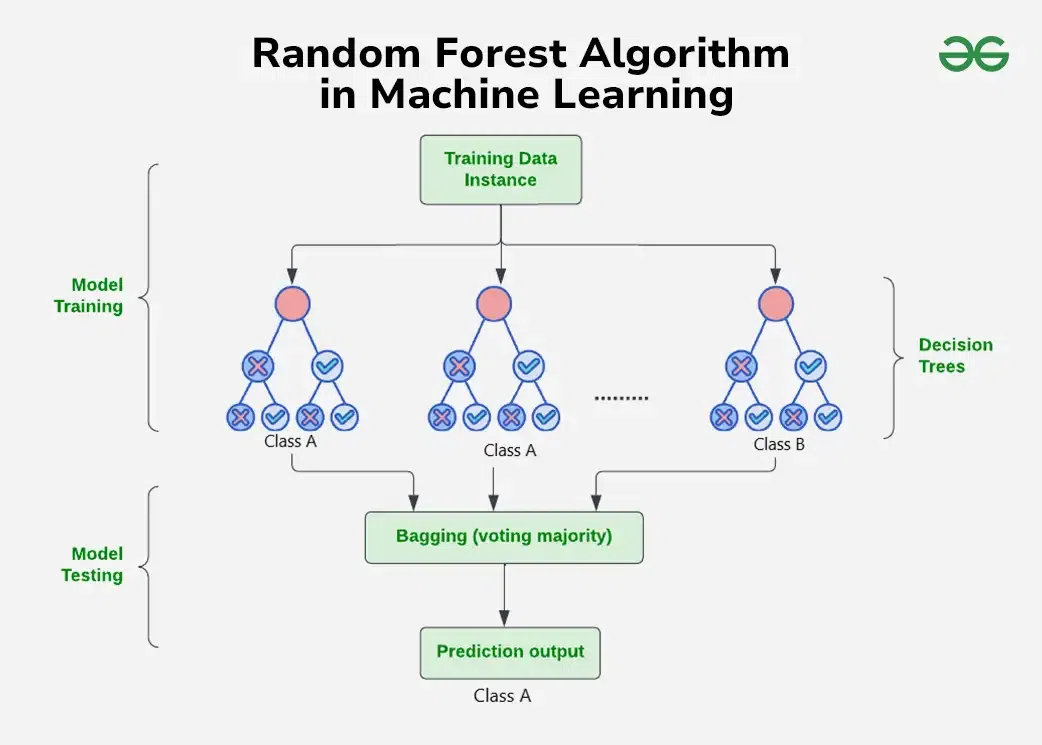

**How Random Forest Algorithm Works?**
The random Forest algorithm works in several steps:

Random Forest builds multiple decision trees using random samples of the data. Each tree is trained on a different subset of the data which makes each tree unique.
When creating each tree the algorithm randomly selects a subset of features or variables to split the data rather than using all available features at a time. This adds diversity to the trees.
Each decision tree in the forest makes a prediction based on the data it was trained on. When making final prediction random forest combines the results from all the trees.
For classification tasks the final prediction is decided by a majority vote. This means that the category predicted by most trees is the final prediction.
For regression tasks the final prediction is the average of the predictions from all the trees.
The randomness in data samples and feature selection helps to prevent the model from overfitting making the predictions more accurate and reliable.

**Advantages of Random Forest**

✔ Handles missing values well.

✔ Works well with both categorical and numerical data.

✔ Reduces variance and overfitting.

✔ Provides feature importance insights.



 **Disadvantages of Random Forest**

❌ Slower than individual decision trees.

❌ Requires more computational power.

❌ Less interpretable than a single decision tree.



**Implementation of Random Forest in Python**

In [1]:
# Install required libraries (if not installed)
!pip install scikit-learn pandas matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris


**Load and Explore the Dataset**

In [2]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Display the first 5 rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


 **Split Data into Training and Testing Sets**

In [3]:
X = df.drop(columns=['target'])
y = df['target']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Train the Random Forest Model**

In [4]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Make Predictions**

In [5]:
# Predict on the test data
y_pred = rf.predict(X_test)


**Evaluate the Model**

In [6]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Feature Importance**

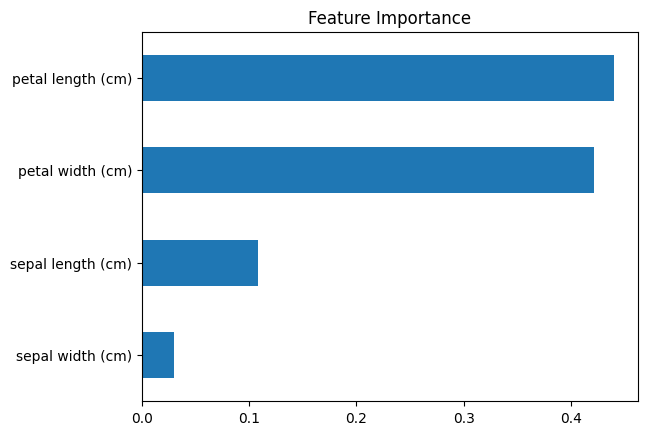

In [7]:
# Plot feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh', title="Feature Importance")
plt.show()


**ENSEMBLE LEARNING**

Ensemble learning is a technique where multiple models (weak learners) are combined to create a strong learner.

Types of Ensemble Learning:

**Bagging** (Bootstrap Aggregating) - Example: Random Forest.
**Boosting**- Example: AdaBoost, Gradient Boosting, XGBoost.
**Stacking** - Combining different models with a meta-model.

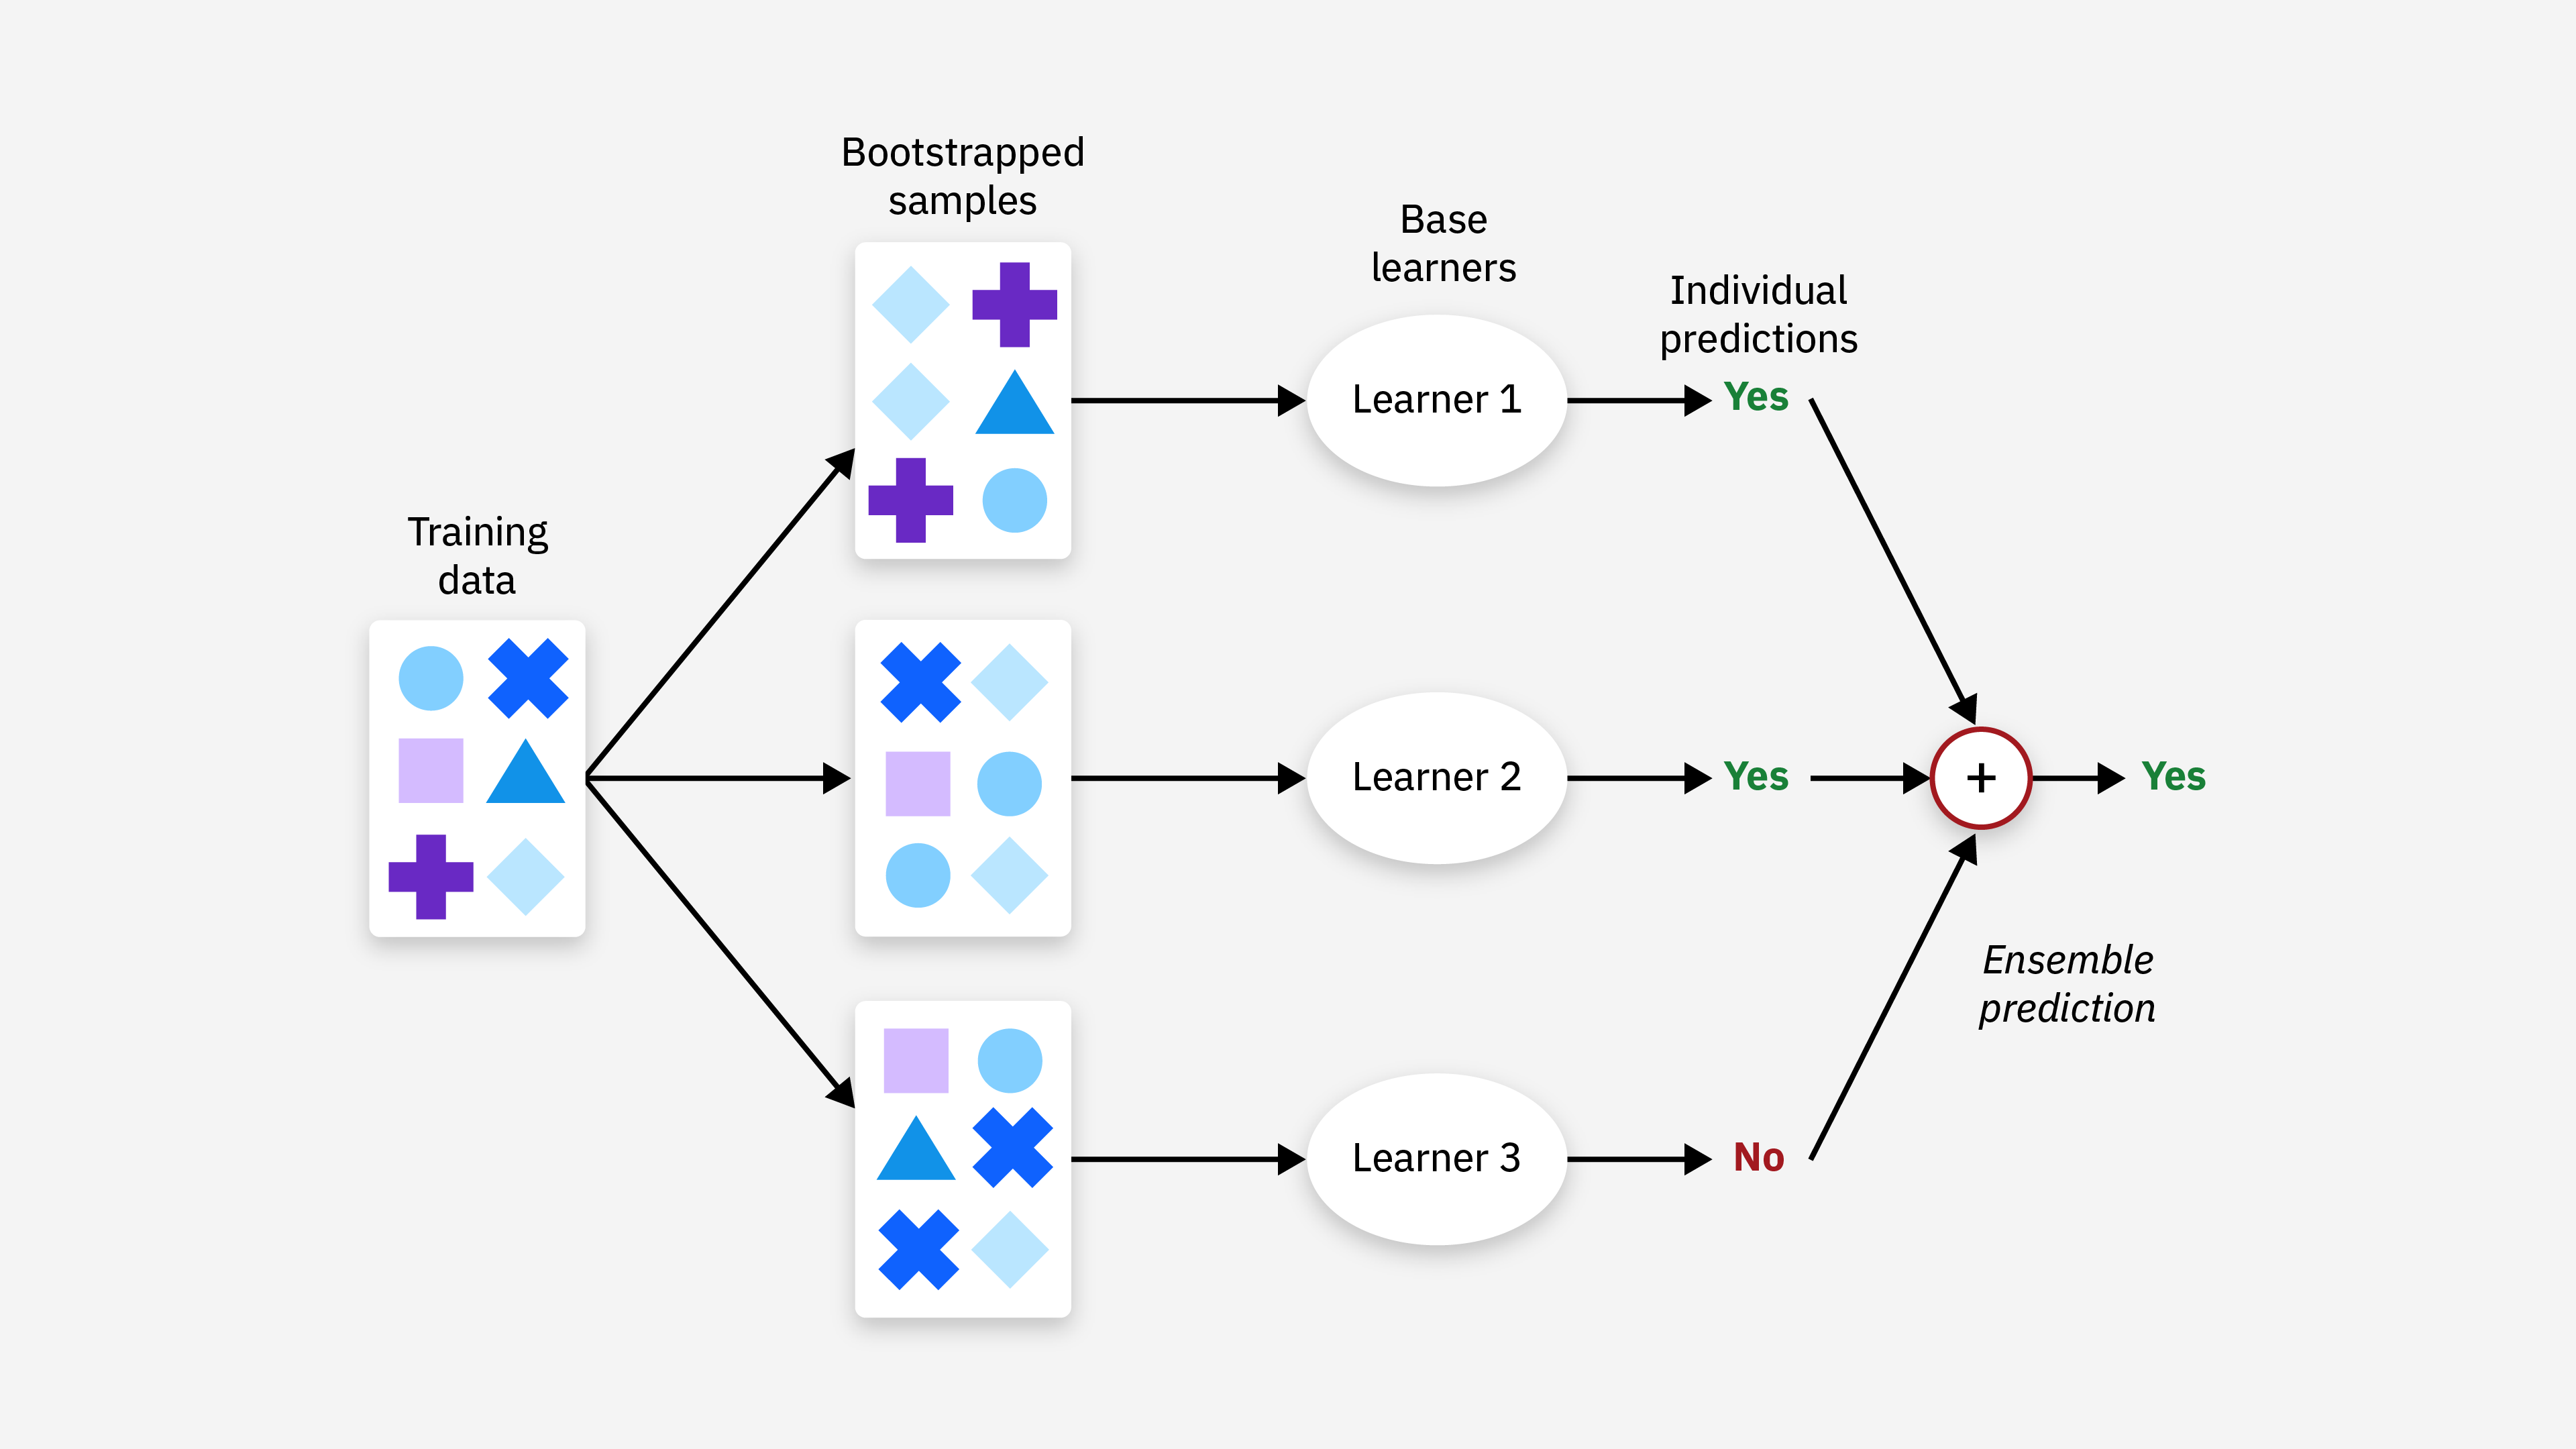

What is Bagging?
Bagging uses multiple models (usually of the same type) trained on random subsets of the dataset. Predictions from all models are averaged (regression) or voted (classification) to give the final result.

✅ Goal: Reduce variance (overfitting) by training on different subsets.

Imagine you want to predict the weather:

One person checks temperature.
Another checks humidity.
Another checks wind speed.
Each person gives their prediction, and you take the majority vote. This reduces the error of a single person's guess.

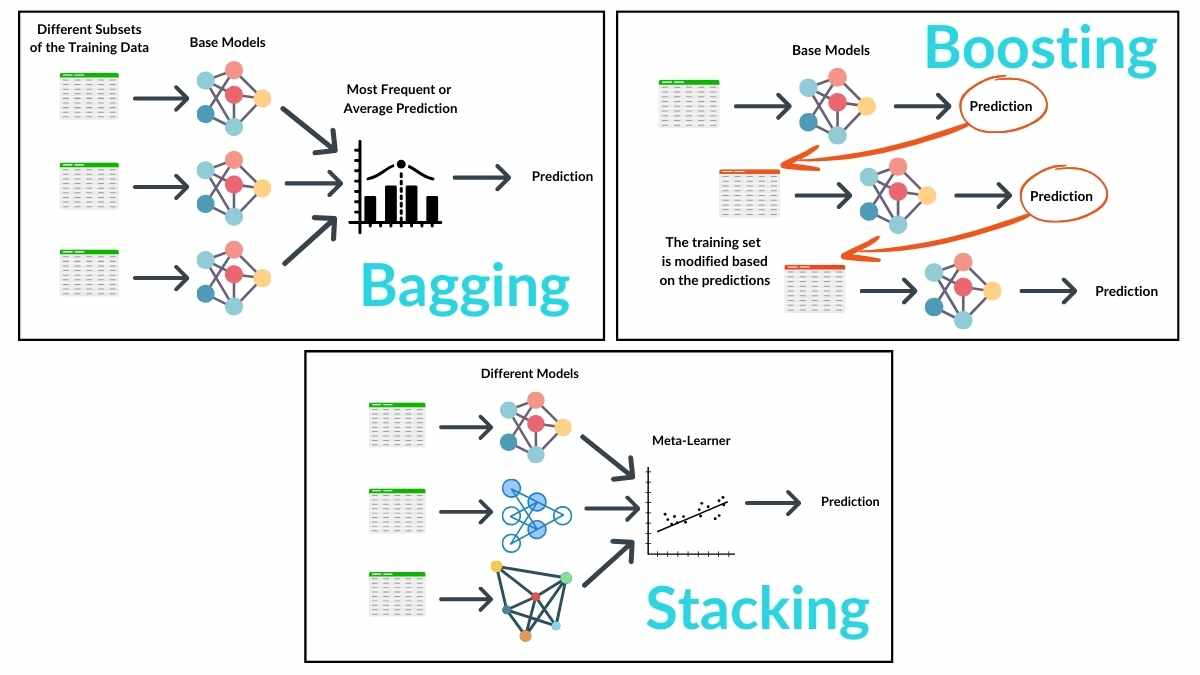

**Practical Example of Bagging using Random Forest**

In [8]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Bagging using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print(f"Bagging (Random Forest) Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Bagging (Random Forest) Accuracy: 1.00


What is Boosting?
Boosting trains models sequentially—each new model corrects the mistakes of the previous one. Weak models become strong by learning from their errors.

✅ Goal: Reduce bias (underfitting) by focusing on difficult cases.

Consider a student learning math:

They fail the first test.
Focus on their mistakes.
Retake another test, improving each time.
Each time the weak areas are corrected, making them stronger overall.



**Practical Example of Boosting using AdaBoost**

In [9]:
from sklearn.ensemble import AdaBoostClassifier

# Apply Boosting using AdaBoost
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)

# Predict and evaluate
y_pred_boost = adaboost.predict(X_test)
print(f"Boosting (AdaBoost) Accuracy: {accuracy_score(y_test, y_pred_boost):.2f}")


Boosting (AdaBoost) Accuracy: 0.93


What is Stacking?
Stacking combines predictions from different models (e.g., Decision Tree, Logistic Regression) using a meta-model to make the final prediction.

✅ Goal: Combine the strengths of different algorithms for better performance.

Imagine a medical diagnosis:

X-ray specialist checks for lung problems.
Blood test specialist checks for infections.
Pathologist confirms findings.
A meta-doctor (meta-model) combines these results for a final diagnosis.

